<a href="https://colab.research.google.com/github/adeth22/TalentoTech_Andres/blob/main/Comentarios_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googletrans==3.1.0a0
!pip install vaderSentiment

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=aab3fdb8b70194b95fc9008c12376bdd64aacc55c45cf544e9785164fd740a86
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from googletrans import Translator
import io
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer archivo csv con pandas df_1. Codigo para leer csv de una carpeta compartida.
url = 'https://drive.google.com/uc?export=download&id=1zze3ihM6H-fy67JdE6eJqF2qMcmFmx_s'
response = requests.get(url)
response.raise_for_status()  # Lanza una excepción si hay un error en la descarga

df = pd.read_csv(io.StringIO(response.text))
df # Visualizar el conjunto de datos

,Comentario
0,La comida fue excelente y el servicio fue exce...
1,El ambiente era agradable y la comida estaba d...
2,"La comida estaba bien, pero el servicio fue le..."
3,"No me gustó la comida, estaba fría y el sabor ..."
4,El peor restaurante en el que he estado. No lo...
...,...
66,Siempre disfruto venir aquí. La comida es deli...
67,"Buen lugar para cenar, aunque el servicio pued..."
68,"La comida está bien, pero el ambiente no es mu..."
69,No me gustó la comida y el servicio fue muy de...


In [ ]:
def translateComment(strComment:str):
  translator = Translator()
  strEngComment = translator.translate(strComment, src="es", dest="en")
  return strEngComment.text

def getPolarity(strComment:str):
  strComment = translateComment(strComment)
  analysis = TextBlob(strComment)
  return analysis.sentiment.polarity

df['Polaridad'] = df['Comentario'].apply(getPolarity)

# Aplicar clasificador de sentimiento

positivos = df[df['Polaridad'] > 0].shape[0]
negativos = df[df['Polaridad'] < 0].shape[0]
neutros = df[df[ 'Polaridad'] == 0].shape[0]

print(f"Comentarios positivos: {positivos}")
print(f"Comentarios negativos: {negativos}")
print (f"Comentarios neutros: {neutros}")

# Función casificar el sentimiento
def classifySentiment(polarity: float):
  if polarity > 0:
    return 'Positivo'
  elif polarity < 0:
    return 'Negativo'
  else:
    return 'Neutral'

df['Sentimiento'] = df['Polaridad'].apply(classifySentiment)

df.to_csv('resultados.csv', index = False)

Comentarios positivos: 43
Comentarios negativos: 28
Comentarios neutros: 0


In [ ]:
df = pd.read_csv('/content/resultados.csv')
df

,Comentario,Polaridad,Sentimiento
0,La comida fue excelente y el servicio fue exce...,0.555556,Positivo
1,El ambiente era agradable y la comida estaba d...,0.261458,Positivo
2,"La comida estaba bien, pero el servicio fue le...",0.200000,Positivo
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000,Negativo
4,El peor restaurante en el que he estado. No lo...,-1.000000,Negativo
...,...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167,Positivo
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833,Positivo
68,"La comida está bien, pero el ambiente no es mu...",0.208974,Positivo
69,No me gustó la comida y el servicio fue muy de...,-0.520000,Negativo


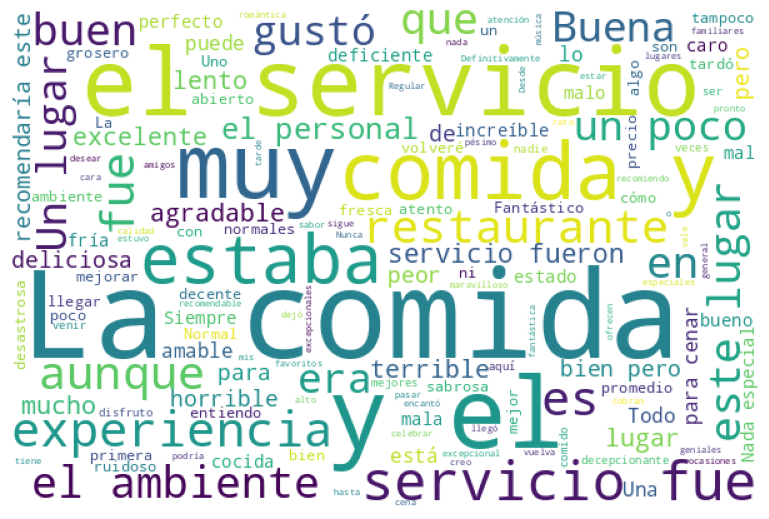

In [ ]:
# Combinar todos los comentarios en una sola cadena
text = " ".join(review for review in df.Comentario)

# Crear la nube de palabras
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Existen tres tipos de comentários: negativo, neutral y negativos.

Siendo:
- Negativos < 0
- Positivos > 0
- Neutrales = 0

<ipython-input-47-c1cb999f2e4d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


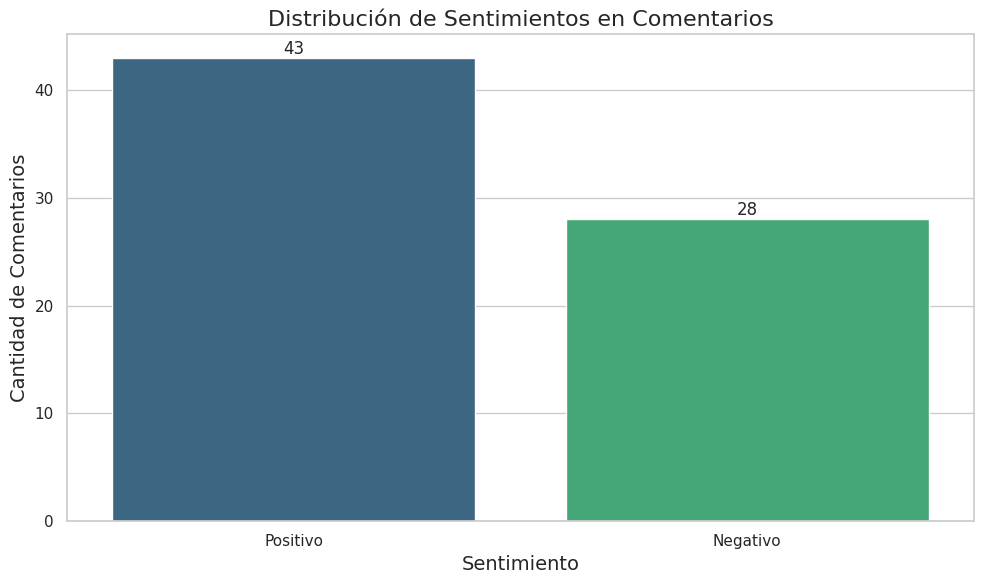

In [ ]:
sns.set(style="whitegrid")

# Cuenta cantidad de comentarios en cada categoría de sentimento
sentiment_counts = df['Sentimiento']. value_counts ()

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title( 'Distribución de Sentimientos en Comentarios', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Cantidad de Comentarios', fontsize=14)

# Valores en law barras
for index, value in enumerate(sentiment_counts.values):
  plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Grafico
plt.tight_layout()
plt.show()